# Manipulating tensor in Numpy

In [1]:
import numpy as np

## Scalar ( 0d matrix)

In [2]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


## Vector ( 1D tensor)

In [3]:
x = np.array([12,3,6,14])
print(x.ndim)

1


## Matrix ( 2D tensor )

In [4]:
x = np.array([[1,2,3],[4,5,6]])

In [5]:
print("x = \n" ,x)
print("No dimensions of x : ",x.ndim)

x = 
 [[1 2 3]
 [4 5 6]]
No dimensions of x :  2


## 3D tensors and higher-dimesional tensors : 


In [6]:
x = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])

In [7]:
x.ndim

3

## Trong deeplearning, ta hầu hết sử dụng 0-4D tensors

## Ta chỉ sử dụng 5D khi thao tác với video

# Định nghĩa về Tensor :

## Phụ thuộc vào 3 yếu tố chính : 
- số chiều (no axes) : ( ma trận :2, ảnh : 3,...)
- shape: ( ma trận : (a,b) ; 3D tensor : (a,b,c))
- data type ( dtype) : Lưu ý không tồn tại string tensor

In [8]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

Using TensorFlow backend.


In [9]:
print(train_images.ndim)

3


In [10]:
print(train_images.dtype)

uint8


In [11]:
print(train_images.shape)

(60000, 28, 28)


### Data là 3D tensor của 8 bit int, đúng hơn là array của 60000 
### ảnh đen trắng có size 28x28, mỗi pixel có giá trị từ 0 đến 255

### Ảnh thứ 4 của train_images : 

In [12]:
digit = train_images[4]

import matplotlib.pyplot as plt


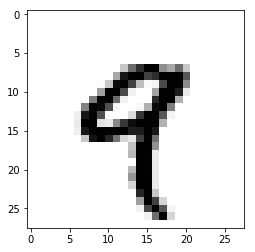

In [13]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Manipulating tensor in Numpy


In [14]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


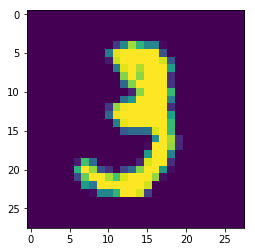

In [15]:
plt.imshow(train_images[10])
plt.show()

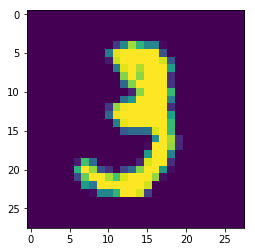

In [16]:
plt.imshow(my_slice[0])
plt.show()

Dấu : tượng trưng cho ( tất cả ) </br>
Ta đã lấy các ảnh [a:b) </br>
a,b cũng có thể âm, ví dụ sau đây dùng để crop ảnh 14x14 ở giữa



In [17]:
my_slice = train_images[:, 7:-7, 7:-7]

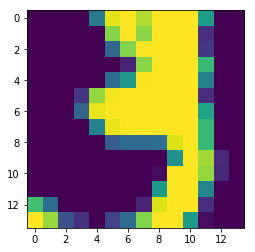

In [18]:
plt.imshow(my_slice[10])
plt.show()

### Batch size : 128 
Đó là cách chia từng cụm 128 ảnh từ train_images

In [19]:
# batch 0
batch = train_images[:128]
# next batch
batch = train_images[128:256]
# nth batch : 
n = 10
batch = train_images[128*n : 128*n+128]

### Hầu hết data sẽ rơi vào 1 trong các loại sau :
- Vector : 2D tensors (samples, features)
- Timeseries / sequence data : 3D tensors (samples, timesteps, features)
- Images : 4D tensors (samples,width,height,channels) or (samples, channels, width, height) with channel ex: 3(RGB)
- Videos : 5D tensors (samples, frames, width,height,channels)


### Vector 
Mỗi người là 1 vector, với 3 features: tuổi, thu nhập và zipcode
-> data set 100 000 người sẽ có shape (100 000,3)

### Time series or sequence data
Khi thời gian hoặc thứ tự/ tuần tự ảnh hưởng đến kết quả </br>
Ta nên lưu nó trong 3D tensor với 1 chiều là thời gian </br>
Lưu ý thời gian luôn là chiều thứ 2 (axis index 1) </br>
vd :</br>
- Giá chứng khoán :  Mỗi sample là 1 ngày (390,3 ) : 390 phút, 3 values, data là 250 ngày (250,390,3)

### Image data
Ảnh thường có 3 chiều : w,h,depth </br>
Ảnh đen trắng : depth(số kênh màu = 1) có thể biểu diễn = 2D tensor
1 batch với 128 ảnh đen trắng size 256x256 có thể chứa đựng trong 1 tensor với shape (128, 256, 256, 1)
Tensorflow conventions : (samples, w,h,color_depth)

### Video data
5D tensor :
- Mỗi frame là 1 ảnh 3D tensor (w,h,depth)
- Chuỗi frames 4D tensor (frames, w, h, depth)
- batch của nhiều video : 5D tensor (samples, frames, w, h, depth)